## Part 3 Multidimensional regression with GPR and ANNs}

In [2]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd
from matplotlib import cm # to change colors of surface plots

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
#plt.style.use("seaborn") # style for plotting that comes from seaborn
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## 6. Multidimensional classification with Support Vector Machines and Decision Trees.

6.1 Using an adequate error metric, compare the approximation obtained when using a Support Vector Machine (SVM) with the RBF kernel and when using Decision Trees to classify the Iris dataset using 75% of points for training. You can use the same parameters we used in class, but please note that the classification task for the SVM should be performed for the 4 features (not 2). Include the six plots of the decision boundaries as a function of feature pairs obtained for both the SVM and the Decision trees.


In [33]:

# Load the Iris dataset.
iris_data = pd.read_csv('docs/Iris.csv')

#print(iris_data)
from sklearn.model_selection import train_test_split

**Support Vector Machines**

When considered feartures are SepalLengthCm and SepalWidthCm, the accuracy of the model =0.8421052631578947


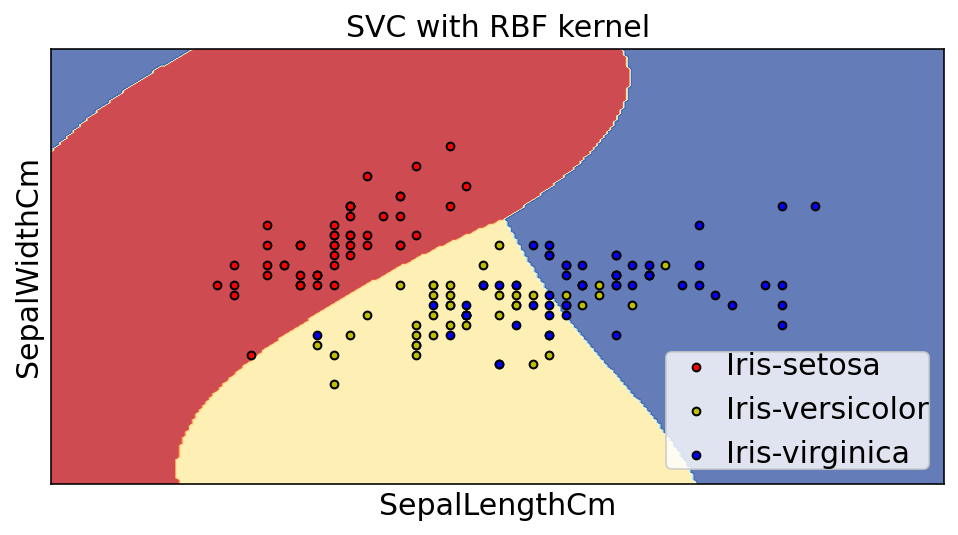

When considered feartures are SepalLengthCm and PetalLengthCm, the accuracy of the model =1.0


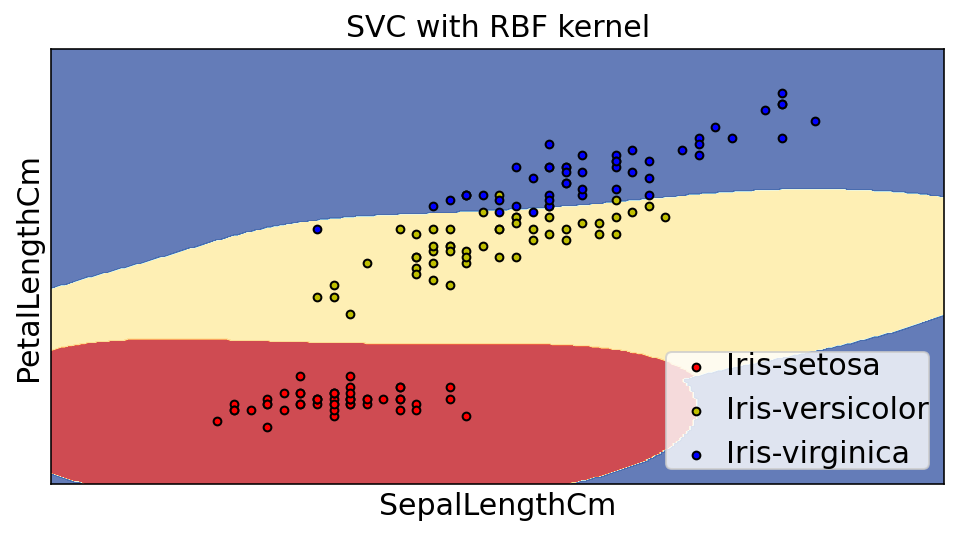

When considered feartures are SepalLengthCm and PetalWidthCm, the accuracy of the model =0.9736842105263158


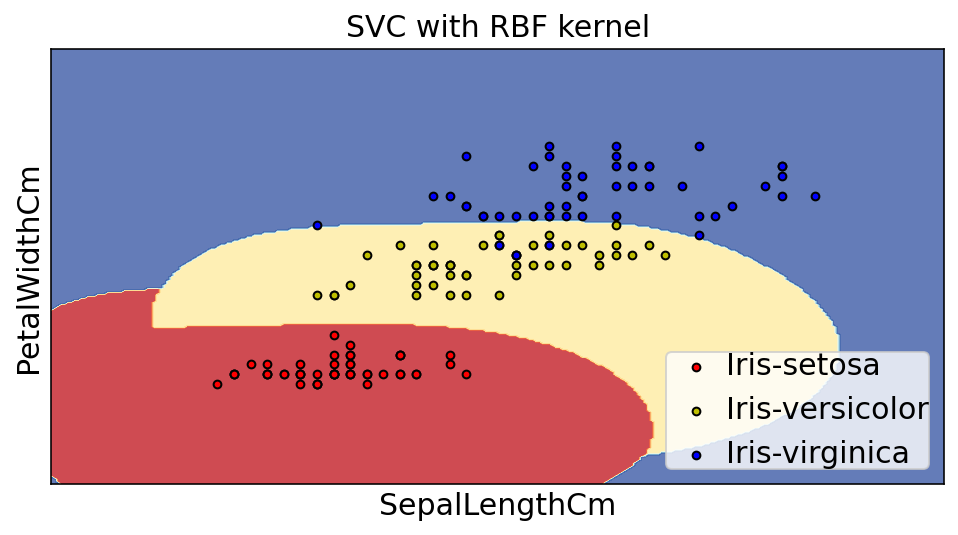

When considered feartures are SepalWidthCm and PetalLengthCm, the accuracy of the model =1.0


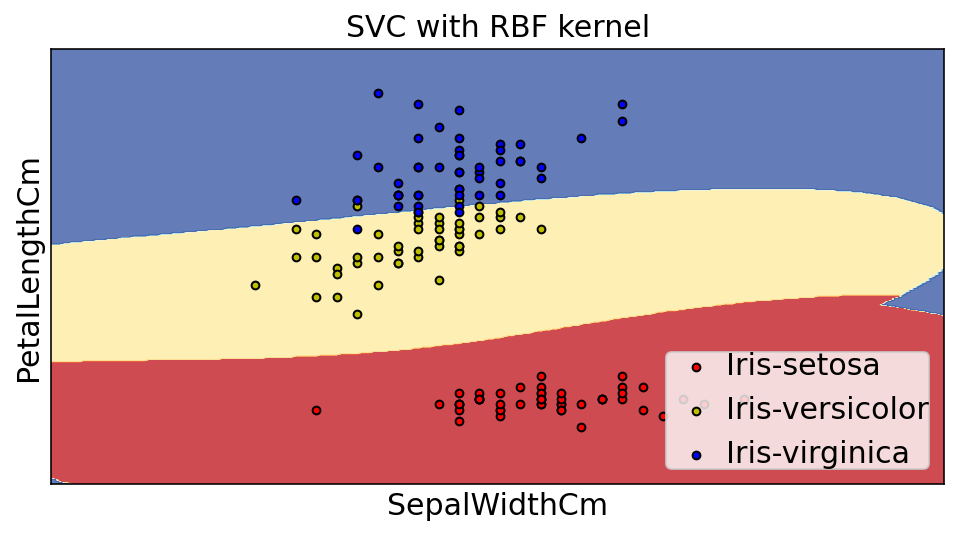

When considered feartures are SepalWidthCm and PetalWidthCm, the accuracy of the model =0.9473684210526315


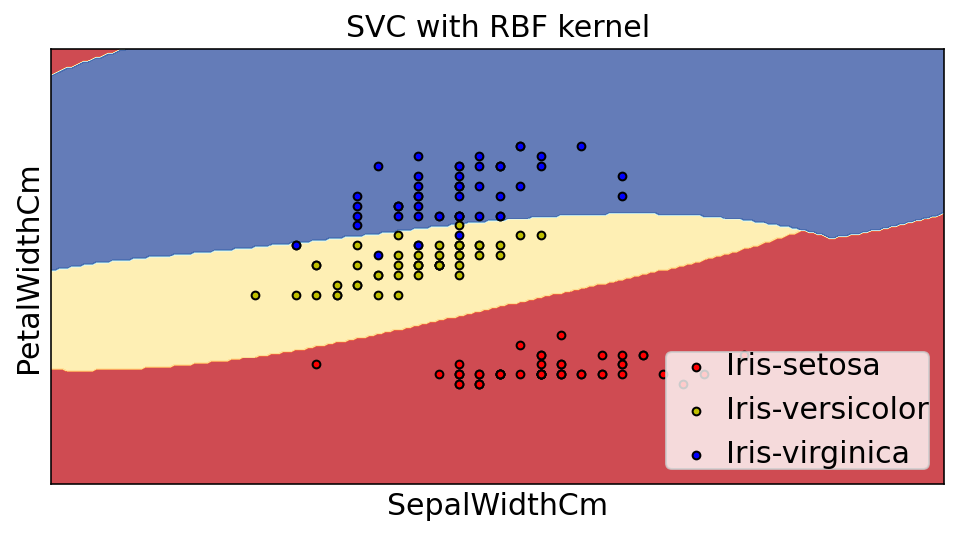

When considered feartures are PetalLengthCm and PetalWidthCm, the accuracy of the model =1.0


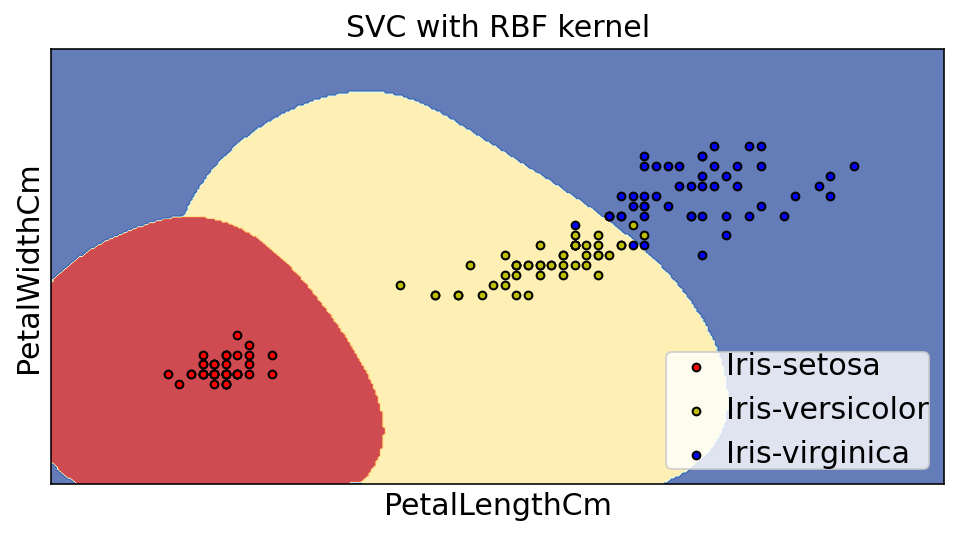

In [49]:
from sklearn.metrics import accuracy_score
feature_names = iris_data.columns.values[1:5]
SL=feature_names[0]
SW=feature_names[1]
PL=feature_names[2]
PW=feature_names[3]
testset_ratio = 0.25 
seed=2022
def SVM(feature1,feature2):
    
    X_2d_iris_data = iris_data.loc[:, [feature1,feature2] ].values 
    y_string_iris_data = iris_data.loc[:, 'Species'].values
    #print('y_string_iris_data = ',y_string_iris_data)
    #print(X_2d_iris_data)
    y_iris_data = pd.Categorical(pd.factorize(y_string_iris_data)[0])
    X_train, X_test, y_train, y_test = train_test_split(X_2d_iris_data, y_iris_data,
                                                    test_size=testset_ratio,random_state=seed)
    from sklearn import svm
    C = 1.0  
    svm_model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    svm_model.fit(X_train, y_train) 
    n_classes = 3 # number of classes for this problem
    plot_colors = "ryb" # defining the 3 colors for each category
    plot_step = 0.02 # defining the meshgrid step size
    target_names = iris_data.loc[:, 'Species'].unique() # retrieve the names of each category
    fig1, ax1 = plt.subplots()
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    x1_iris_data_train, x2_iris_data_train = X_train[:, 0], X_train[:, 1]
    x1_iris_data_min, x1_iris_data_max = x1_iris_data_train.min() - 1, x1_iris_data_train.max() + 1 # define min & max of feature 0
    x2_iris_data_min, x2_iris_data_max = x2_iris_data_train.min() - 1, x2_iris_data_train.max() + 1 # define min & max of feature 1
    X1_iris_data_grid, X2_iris_data_grid = np.meshgrid(np.arange(x1_iris_data_min, x1_iris_data_max, plot_step),
                                                   np.arange(x2_iris_data_min, x2_iris_data_max, plot_step))
    
    y_iris_data_pred = svm_model.predict(np.c_[X1_iris_data_grid.ravel(), X2_iris_data_grid.ravel()])
    Y_iris_data_grid = y_iris_data_pred.reshape(X1_iris_data_grid.shape)

    x1_iris_data_test, x2_iris_data_test = X_test[:, 0], X_test[:, 1]
    x1_iris_data_test_min, x1_iris_data_test_max = x1_iris_data_test.min() - 1, x1_iris_data_test.max() + 1 # define min & max of feature 0
    x2_iris_data_test_min, x2_iris_data_test_max = x2_iris_data_test.min() - 1, x2_iris_data_test.max() + 1 # define min & max of feature 1
    X1_iris_data_test_grid, X2_iris_data_test_grid = np.meshgrid(np.arange(x1_iris_data_test_min, x1_iris_data_test_max, plot_step),
                                                   np.arange(x2_iris_data_test_min, x2_iris_data_test_max, plot_step))
    
    y_test_pred=svm_model.predict(X_test)
    acc=accuracy_score(y_true = y_test, y_pred = y_test_pred)
    print('When considered feartures are %s and %s, the accuracy of the model =%s' %(feature1,feature2,acc))


    
    ax1.contourf(X1_iris_data_grid, X2_iris_data_grid, Y_iris_data_grid, cmap=cm.RdYlBu, alpha=0.8)
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_iris_data == i)
        ax1.scatter(X_2d_iris_data[idx, 0], X_2d_iris_data[idx, 1],
                c=color, label=target_names[i],cmap=cm.RdYlBu, edgecolor='black', s=15)
    ax1.set_xlim(X1_iris_data_grid.min(), X1_iris_data_grid.max())
    ax1.set_ylim(X2_iris_data_grid.min(), X2_iris_data_grid.max())
    ax1.set_xlabel('%s'%feature1, fontsize=15)
    ax1.set_ylabel('%s'%feature2, fontsize=15)
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.legend(loc='lower right', borderpad=0, handletextpad=0, fontsize=15)
    ax1.set_title('SVC with RBF kernel', fontsize=15)
    plt.show(fig1)


SVM(SL,SW)
SVM(SL,PL)
SVM(SL,PW)
SVM(SW,PL)
SVM(SW,PW)
SVM(PL,PW)

**Desicion Trees**

In [5]:
X_iris_data = iris_data.iloc[:, 1:5 ].values # now using all 4 features (inputs)
feature_names = iris_data.columns.values[1:5] # not including the "ID" column
y_string_iris_data = iris_data.loc[:, 'Species'].values
y_iris_data = pd.Categorical(pd.factorize(y_string_iris_data)[0])
print(y_iris_data)

[0, 0, 0, 0, 0, ..., 2, 2, 2, 2, 2]
Length: 150
Categories (3, int64): [0, 1, 2]


When considered feartures are SepalLengthCm and SepalWidthCm, the accuracy of the model =0.6842105263157895
When considered feartures are SepalLengthCm and PetalLengthCm, the accuracy of the model =0.9736842105263158
When considered feartures are SepalLengthCm and PetalWidthCm, the accuracy of the model =0.9473684210526315
When considered feartures are SepalWidthCm and PetalLengthCm, the accuracy of the model =0.9473684210526315
When considered feartures are SepalWidthCm and PetalWidthCm, the accuracy of the model =0.9210526315789473
When considered feartures are PetalLengthCm and PetalWidthCm, the accuracy of the model =1.0


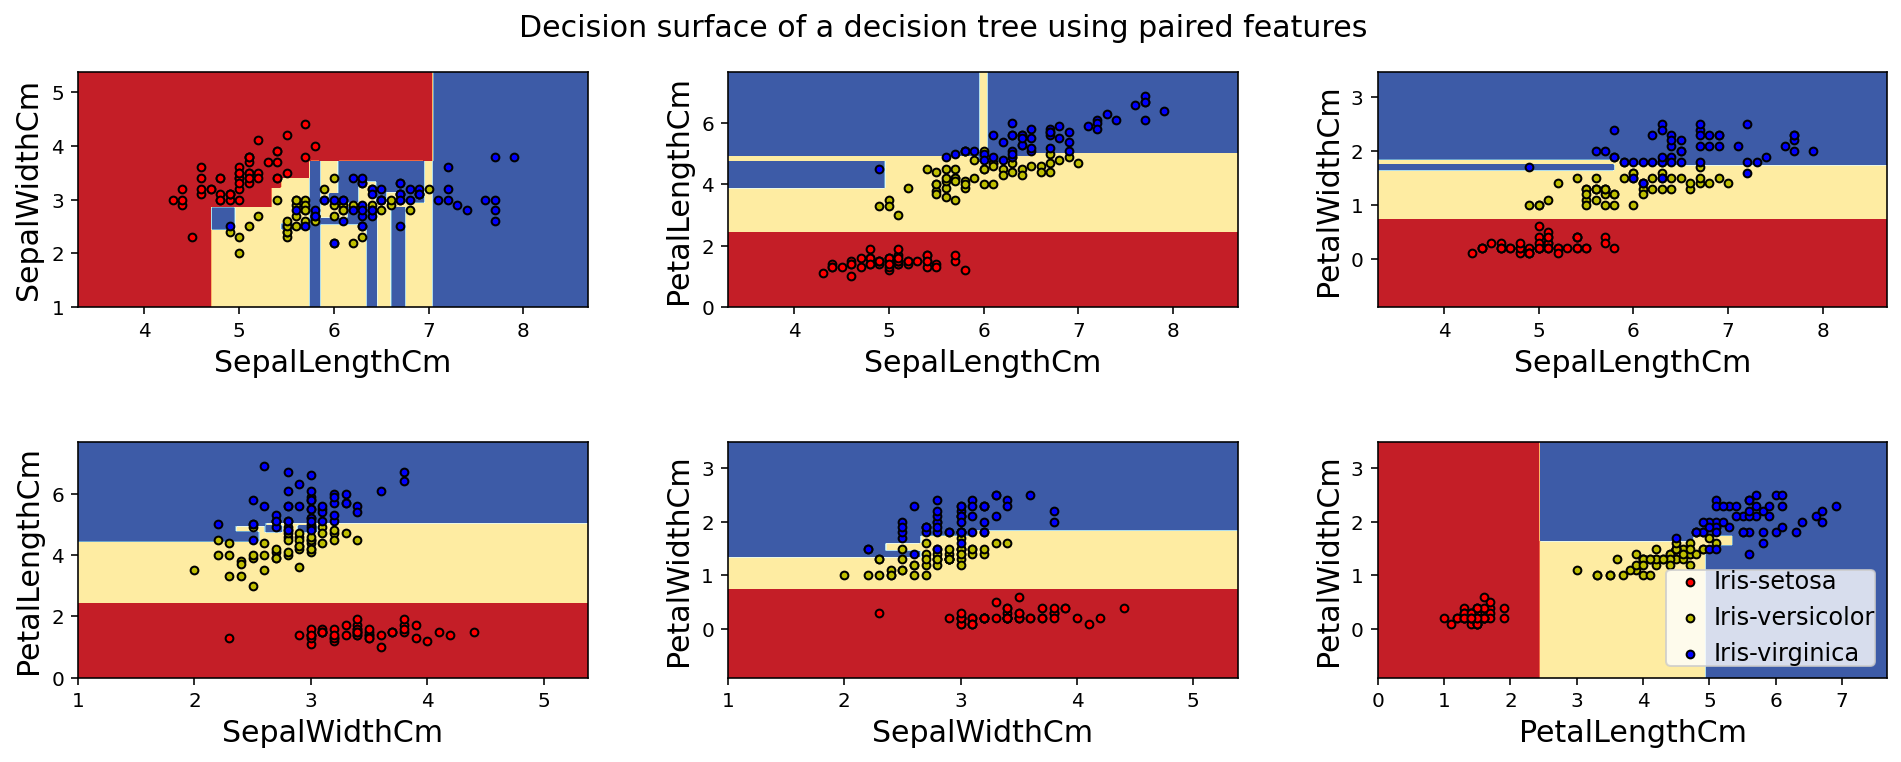

In [50]:
from sklearn.tree import DecisionTreeClassifier
seed=2022
fig2, ax2 = plt.subplots() # open figure
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    #
    X_iris_data_temp = X_iris_data[:, pair]
    
    X_train, X_test, y_train, y_test = train_test_split(X_iris_data_temp, y_iris_data,
                                                    test_size=0.25,random_state=seed)
    # Train Decision Tree
    DT_model = DecisionTreeClassifier().fit(X_train, y_train) # Fit the model only to these 2 features
                                                  # NOTE: here we are doing this so that we can assess
                                                  #the predictive power of the decision tree even though
                                                  #it is using only 2 features (instead of all 4!)
                                                  # REMEMBER: USUALLY WE USE ALL FEATURES WHEN TRAINING A MODEL
    # Plot the decision boundary
    plt.subplot(2, 3 ,pairidx+1)
    plot_step=0.02
    n_classes=3
    plot_colors = "ryb" # defining the 3 colors for each category
    target_names = iris_data.loc[:, 'Species'].unique() # retrieve the names of each category
    

    x1_iris_data_min, x1_iris_data_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_iris_data_min, x2_iris_data_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    X1_iris_data_grid, X2_iris_data_grid = np.meshgrid(np.arange(x1_iris_data_min, x1_iris_data_max, plot_step),
                                                       np.arange(x2_iris_data_min, x2_iris_data_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Y_iris_data = DT_model.predict(np.c_[X1_iris_data_grid.ravel(), X2_iris_data_grid.ravel()])
    Y_iris_data_grid = Y_iris_data.reshape(X1_iris_data_grid.shape)
    cs = plt.contourf(X1_iris_data_grid, X2_iris_data_grid, Y_iris_data_grid, cmap=cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]], fontsize=15)
    plt.ylabel(feature_names[pair[1]], fontsize=15)
    y_test_pred=DT_model.predict(X_test)
    acc=accuracy_score(y_true = y_test, y_pred = y_test_pred)
    print('When considered feartures are %s and %s, the accuracy of the model =%s' %(feature_names[pair[0]],feature_names[pair[1]],acc))

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_iris_data == i)
        plt.scatter(X_iris_data_temp[idx, 0], X_iris_data_temp[idx, 1],
                    c=color, label=target_names[i],cmap=cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features", fontsize=15)
plt.legend(loc='lower right', borderpad=0, handletextpad=0, fontsize=12)
plt.axis("tight")
#plt.tight_layout()
fig2.set_size_inches(15, 6)
plt.close(fig2)
fig2